In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/Business_analyst_job_listings_linkedin.csv')

In [3]:
df.head()

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
0,Business Analyst,United States,2024-09-04,Wipro,About the Company:\n\nWipro Limited (NYSE: WIT...,Over 200 applicants,Full-time,Mid-Senior level,Analyst and Health Care Provider,IT Services and IT Consulting
1,"Business Analyst, CS Workforce Management",United States,2024-08-23,Netflix,Netflix is one of the world’s leading entertai...,Over 200 applicants,Full-time,Not Applicable,Other,Entertainment Providers
2,Business Analyst,"Atlanta, GA",2024-08-02,"Donato Technologies, Inc.",Required Fields\n\n\n * Number of Positions re...,170 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",IT Services and IT Consulting
3,Business Analyst,"Miami, FL",2024-08-20,Carnival Cruise Line,"Job ID 7930 Location Miami, FL Date posted 07/...",Over 200 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",Travel Arrangements
4,Business Analyst,"New York, NY",2024-08-27,"Relevante, Inc.","Salary: $ 130,000.00\n\nWe have partnered with...",Over 200 applicants,Full-time,Associate,"Research, Analyst, and Information Technology",Banking


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              921 non-null    object
 1   location           921 non-null    object
 2   publishedAt        921 non-null    object
 3   companyName        911 non-null    object
 4   description        921 non-null    object
 5   applicationsCount  921 non-null    object
 6   contractType       921 non-null    object
 7   experienceLevel    921 non-null    object
 8   workType           921 non-null    object
 9   sector             921 non-null    object
dtypes: object(10)
memory usage: 72.1+ KB


In [5]:
#remove duplicate
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 0 to 920
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              912 non-null    object
 1   location           912 non-null    object
 2   publishedAt        912 non-null    object
 3   companyName        902 non-null    object
 4   description        912 non-null    object
 5   applicationsCount  912 non-null    object
 6   contractType       912 non-null    object
 7   experienceLevel    912 non-null    object
 8   workType           912 non-null    object
 9   sector             912 non-null    object
dtypes: object(10)
memory usage: 78.4+ KB


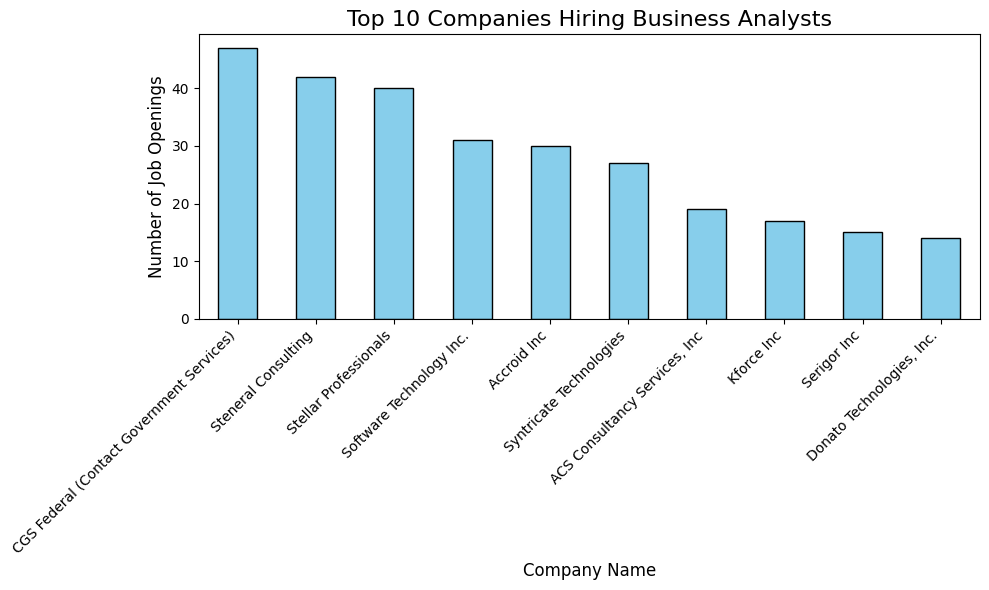

In [7]:
import matplotlib.pyplot as plt

# Group by companyName and count the occurrences, then get the top 10
top_companies = df['companyName'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Companies Hiring Business Analysts', fontsize=16)
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Number of Job Openings', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [8]:
# Group by companyName and count the occurrences
top_companies = df['companyName'].value_counts().head(10)

# Print the result
print(top_companies)


companyName
CGS Federal (Contact Government Services)    47
Steneral Consulting                          42
Stellar Professionals                        40
Software Technology Inc.                     31
Accroid Inc                                  30
Syntricate Technologies                      27
ACS Consultancy Services, Inc                19
Kforce Inc                                   17
Serigor Inc                                  15
Donato Technologies, Inc.                    14
Name: count, dtype: int64


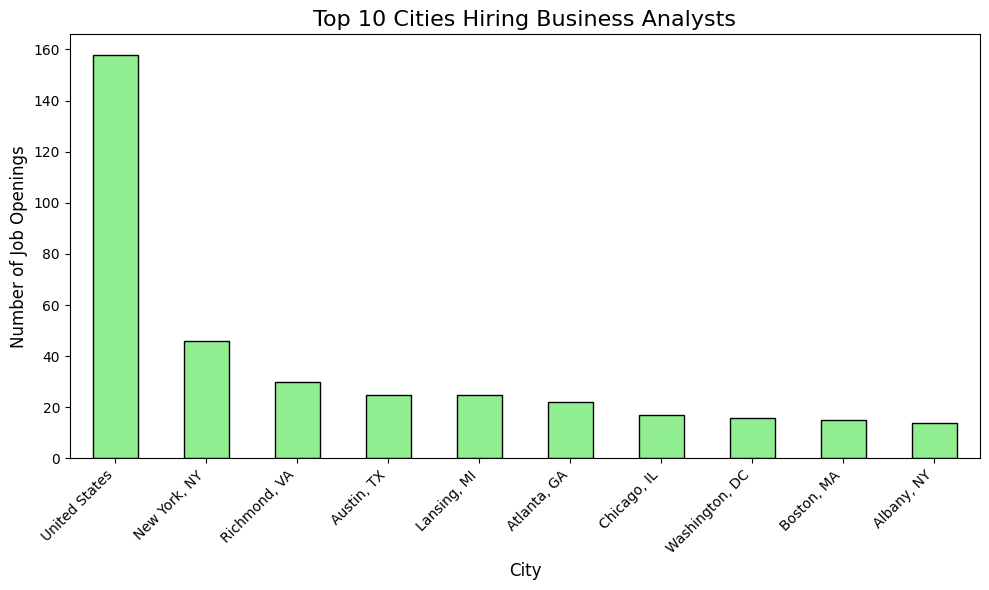

In [9]:
# Group by location (city-level) and count the occurrences
top_locations = df['location'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Cities Hiring Business Analysts', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Job Openings', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [10]:
import plotly.express as px

# Group by country-level and count the occurrences (assuming 'location' has countries)
country_data = df['location'].value_counts().reset_index()
country_data.columns = ['Country', 'Job Openings']

# Create the choropleth map
fig = px.choropleth(
    country_data,
    locations='Country',
    locationmode='country names',
    color='Job Openings',
    title='Job Openings by Country',
    color_continuous_scale='Blues'
)
fig.show()


Experience Level Demand (%):
Associate: 47.8%
Mid-Senior level: 36.0%
Not Applicable: 8.9%
Entry level: 6.7%
Director: 0.3%
Executive: 0.2%
Internship: 0.1%


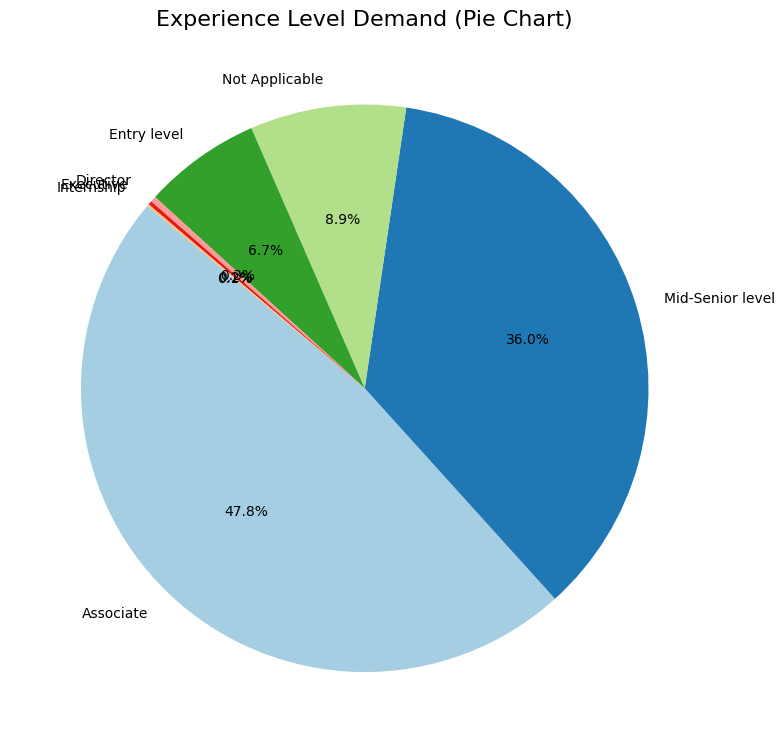

In [13]:
# Calculate the frequency of each experience level
experience_counts = df['experienceLevel'].value_counts()

# Calculate percentages
experience_percentages = (experience_counts / experience_counts.sum()) * 100

# Print the percentages for clear visualization
print("Experience Level Demand (%):")
for level, percentage in experience_percentages.items():
    print(f"{level}: {percentage:.1f}%")

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Experience Level Demand (Pie Chart)', fontsize=16)
plt.tight_layout()
plt.show()


In [14]:
# Convert applicationsCount to numeric values
df['applicationsCount_numeric'] = df['applicationsCount'].str.extract(r'(\d+)').astype(float)


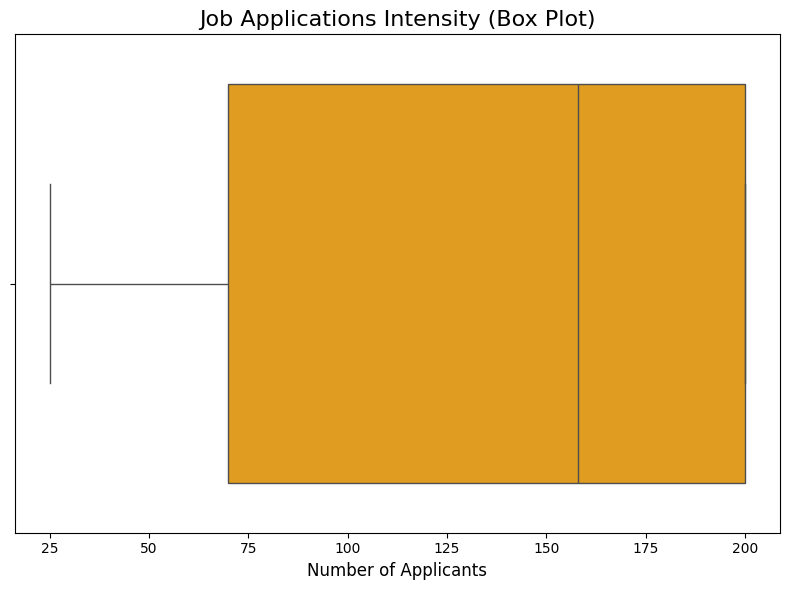

In [15]:
import seaborn as sns

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='applicationsCount_numeric', color='orange')
plt.title('Job Applications Intensity (Box Plot)', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.tight_layout()
plt.show()


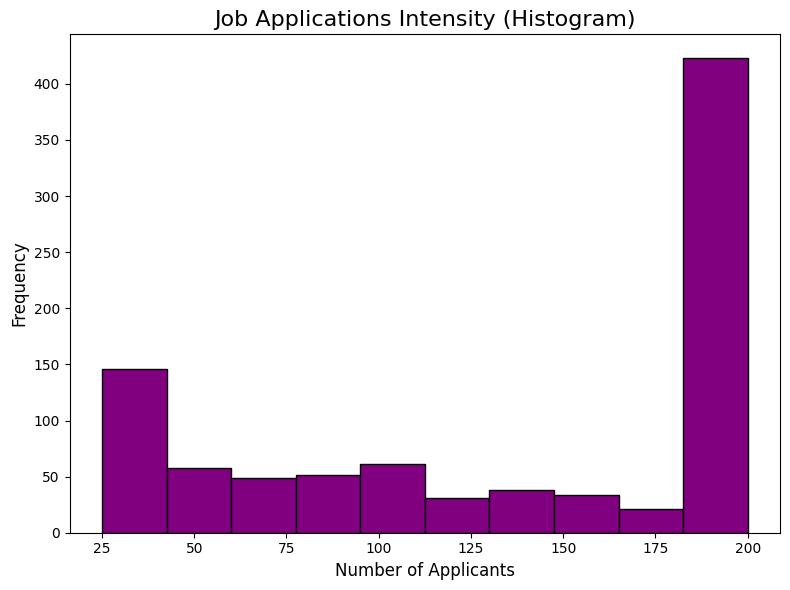

In [16]:
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['applicationsCount_numeric'], bins=10, color='purple', edgecolor='black')
plt.title('Job Applications Intensity (Histogram)', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


In [17]:
# Print summary statistics
print(df['applicationsCount_numeric'].describe())


count    912.000000
mean     135.466009
std       68.726753
min       25.000000
25%       69.750000
50%      158.000000
75%      200.000000
max      200.000000
Name: applicationsCount_numeric, dtype: float64


Contract Type Breakdown (%):
Full-time: 54.7%
Contract: 44.0%
Temporary: 0.7%
Part-time: 0.7%


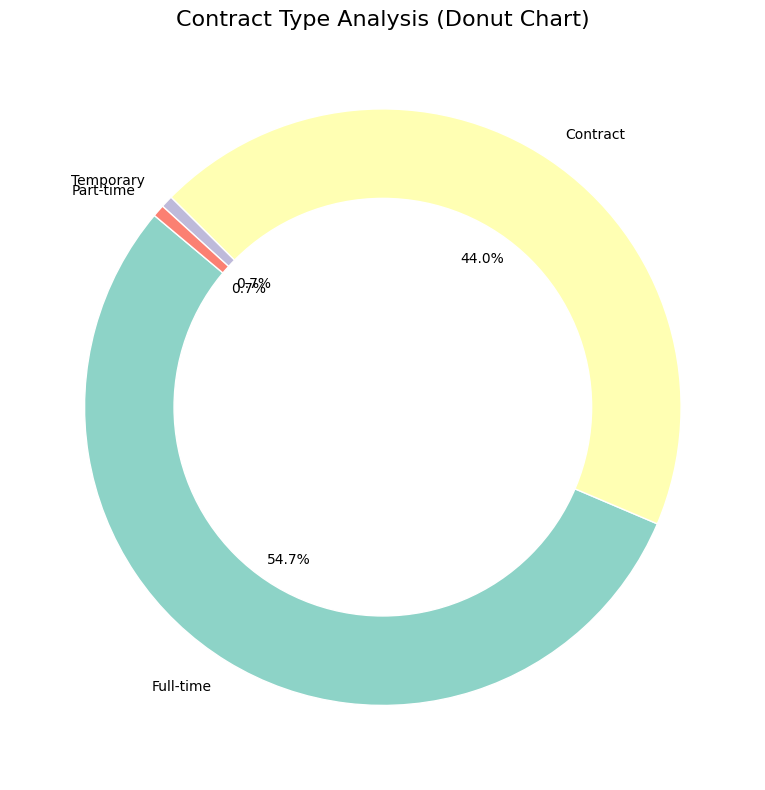

In [19]:
# Calculate the frequency of each contract type
contract_counts = df['contractType'].value_counts()

# Calculate percentages
contract_percentages = (contract_counts / contract_counts.sum()) * 100

# Print exact counts and percentages
print("Contract Type Breakdown (%):")
for contract, percentage in contract_percentages.items():
    print(f"{contract}: {percentage:.1f}%")

# Plot the donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    contract_counts,
    labels=contract_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
# Add a central circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=1)
plt.gca().add_artist(centre_circle)

# Add title
plt.title('Contract Type Analysis (Donut Chart)', fontsize=16)
plt.tight_layout()
plt.show()


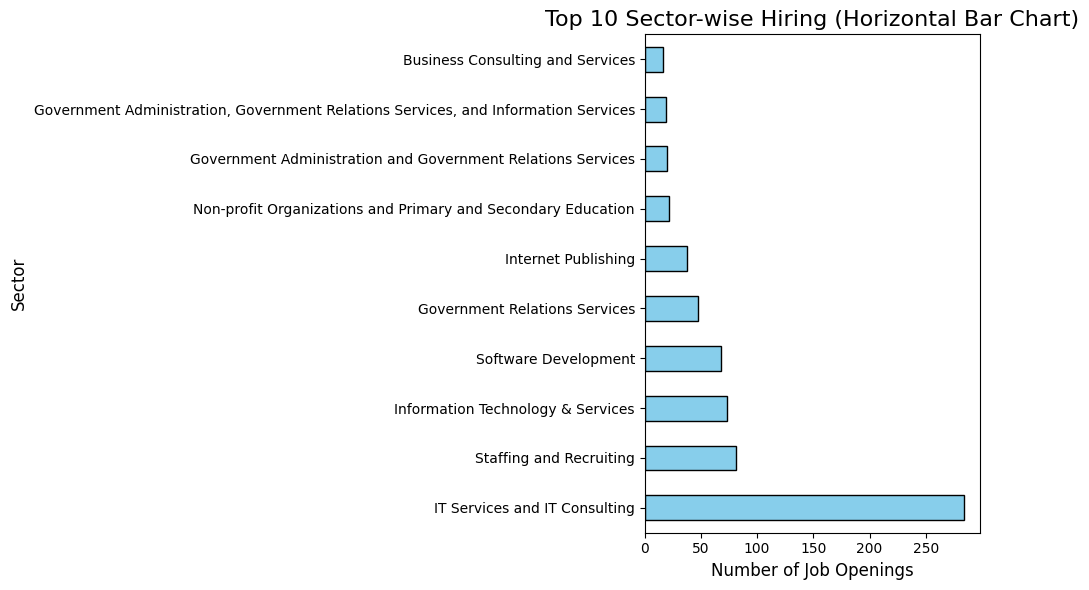

In [21]:
# Calculate the frequency of each sector
sector_counts = df['sector'].value_counts()

# Select the top 10 sectors
top_10_sectors = sector_counts.head(10)

# Plot the horizontal bar chart for top 10 sectors
plt.figure(figsize=(10, 6))
top_10_sectors.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Sector-wise Hiring (Horizontal Bar Chart)', fontsize=16)
plt.xlabel('Number of Job Openings', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.tight_layout()
plt.show()


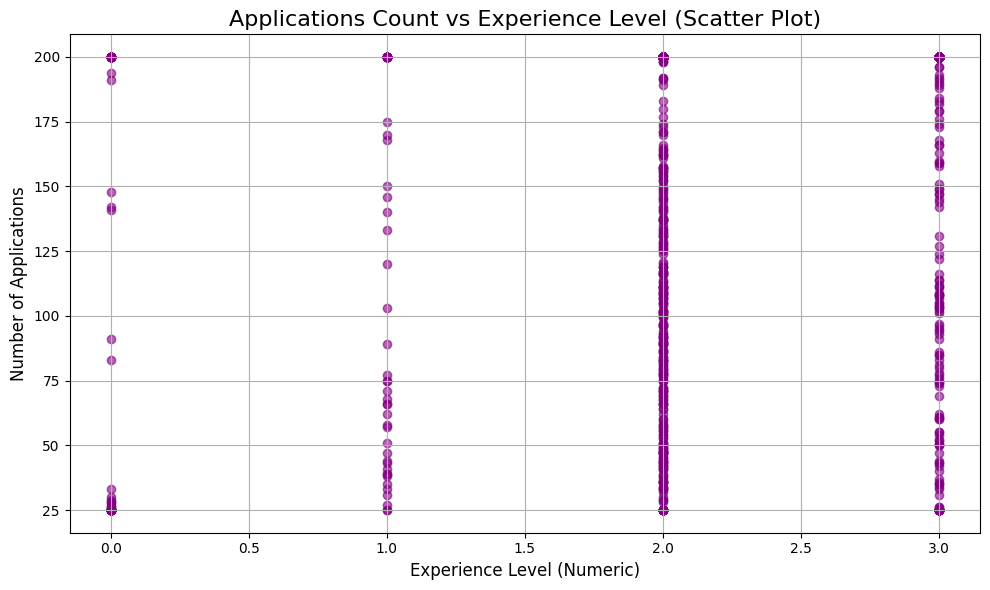

In [24]:
# First, we need to convert experienceLevel into a categorical numeric value to plot
# You can use a mapping system like:
# 'Not Applicable' -> 0, 'Entry level' -> 1, 'Associate' -> 2, 'Mid-Senior level' -> 3, 'Senior' -> 4

experience_mapping = {
    'Not Applicable': 0,
    'Entry level': 1,
    'Associate': 2,
    'Mid-Senior level': 3,
    'Senior': 4
}

# Map the experience level column to numeric values
df['experience_numeric'] = df['experienceLevel'].map(experience_mapping)

# Convert applicationsCount to numeric (removing any non-numeric characters like "applicants")
df['applications_numeric'] = df['applicationsCount'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
df['applications_numeric'] = pd.to_numeric(df['applications_numeric'], errors='coerce')  # Convert to numeric

# Scatter plot: Applications Count vs Experience Level
plt.figure(figsize=(10, 6))
plt.scatter(df['experience_numeric'], df['applications_numeric'], alpha=0.6, color='purple')
plt.title('Applications Count vs Experience Level (Scatter Plot)', fontsize=16)
plt.xlabel('Experience Level (Numeric)', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)

# Add grid for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()
